# Plotting and Visualization

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from ggplot import *
import plotly as py
import plotly.graph_objs as go
%matplotlib inline 
rc = {"figure.figsize": [14, 6], 
     "font.family": "sans-serif", 
     "font.sans-serif": ["Helvetica"]}
sns.set(rc = rc)
sns.set_style("whitegrid") #to adopt the styling of seaborn

In [3]:
#rc = {'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 30, 'font.size': 30, 
#    'legend.fontsize': 25.0, 'axes.titlesize': 30, "figure.figsize": [10, 6]}

## Using seaborn

### Line plots

In [18]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
s

0    -0.603858
10   -0.819610
20   -1.609472
30   -0.567467
40   -1.135923
50   -1.102015
60   -2.458050
70   -1.938280
80   -1.627601
90   -0.820670
dtype: float64

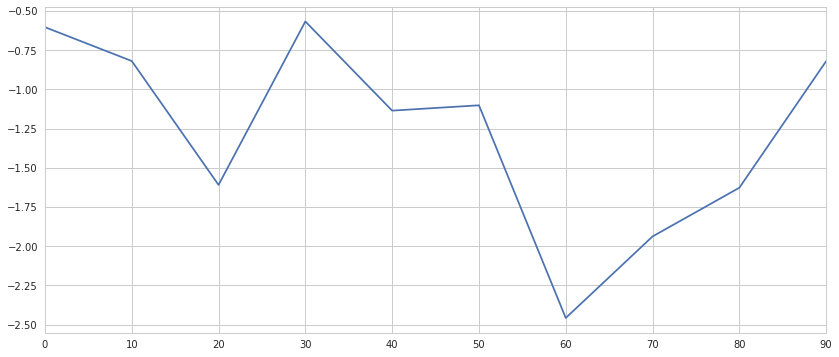

In [32]:
s.plot.line()

In [9]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), 
       columns = ["A", "B", "C", "C"], 
       index = np.arange(0, 100, 10))
df

,A,B,C,C
0,-0.821739,0.942990,-0.727131,-0.196595
10,-1.674078,0.939622,-0.631280,-3.164703
20,-2.009409,1.247629,-0.568114,-3.894840
30,-1.964458,1.028819,0.039396,-3.416286
40,-2.073151,0.979842,-0.661823,-3.040442
50,-1.662101,1.652299,0.216440,0.333776
60,-3.274775,1.338542,1.808579,-0.504213
70,-2.332818,-0.087914,-0.932534,0.258251
80,-0.570083,-0.526691,-2.293621,0.490162
90,-1.314128,1.253090,-3.684265,0.208951


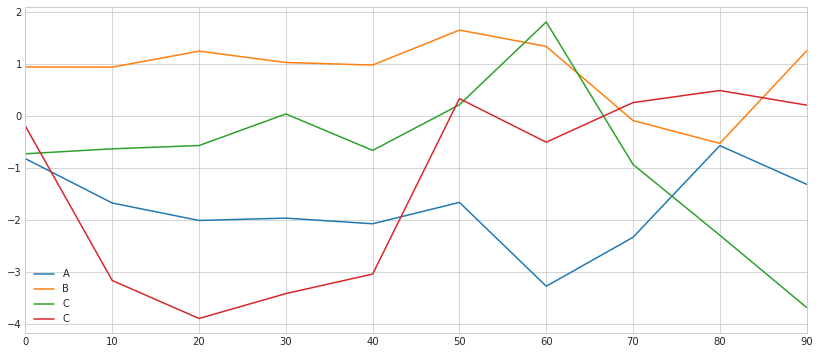

In [10]:
df.plot.line()

### Bar plots

In [29]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.974782,0.308297,0.599262,0.866541
two,0.210145,0.231744,0.511844,0.281000
three,0.158422,0.508099,0.420399,0.718876
four,0.548485,0.435007,0.572815,0.397806
five,0.910983,0.124226,0.255813,0.080639
six,0.381510,0.573796,0.611551,0.491685


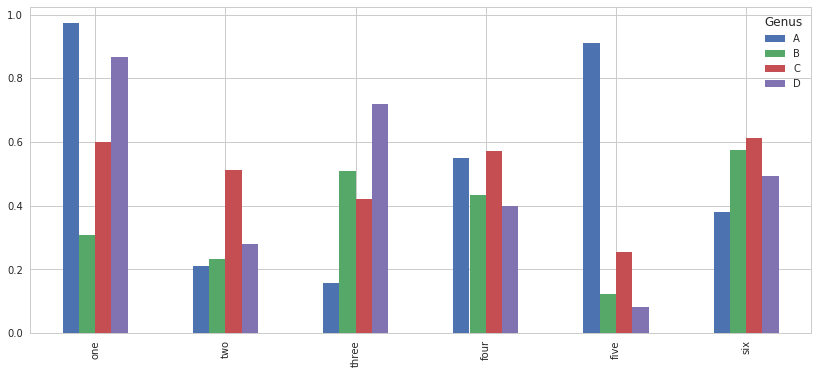

In [33]:
df.plot.bar()

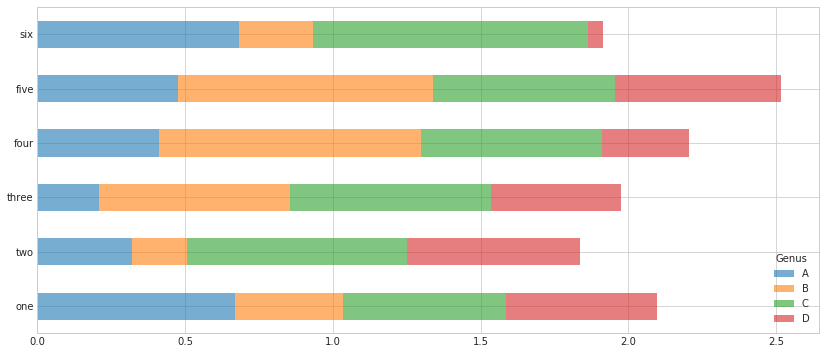

In [13]:
# stacked bar plots
df.plot.barh(stacked = True, alpha = 0.6)

In [14]:
# tips is one of the datasets that comes with seaborn
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


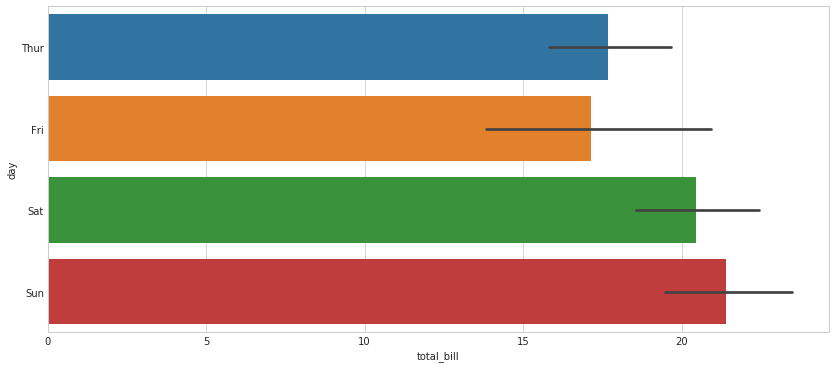

In [15]:
sns.barplot(x = "total_bill", y = "day", data = tips)

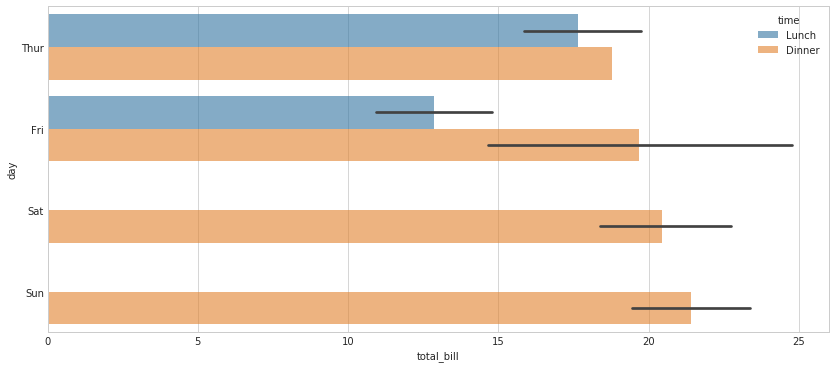

In [16]:
sns.barplot(data = tips, x = "total_bill", y = "day", hue = "time", alpha = .6)

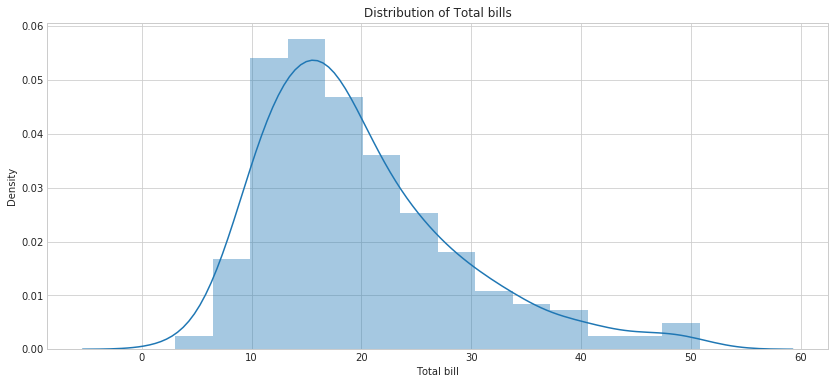

In [17]:
p = sns.distplot(tips["total_bill"])
p.set(xlabel = "Total bill", ylabel = "Density", title = "Distribution of Total bills")

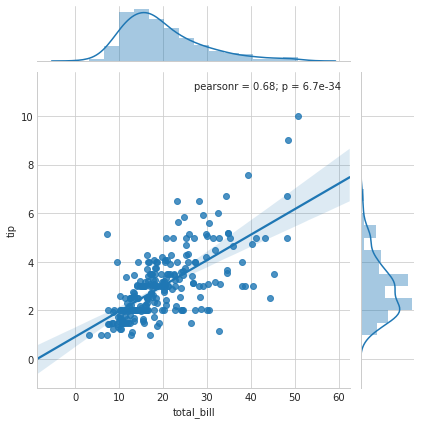

In [18]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "reg")

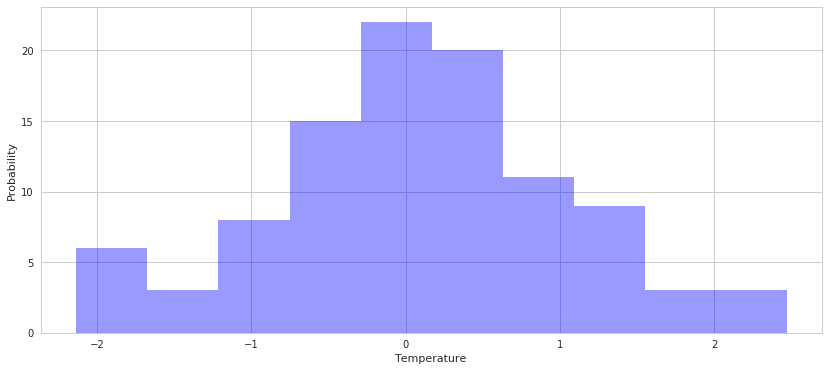

In [11]:
#### Saving plots for papers
rs = np.random.RandomState(10)
d = rs.normal(size=100)
fig, ax = plt.subplots()
sns.distplot(d, kde=False, color="b")
ax.set_xlabel("Temperature")
ax.set_ylabel("Probability")
plt.savefig('distplot.png', dpi=400, bbox_inches='tight')

## Using ggplot

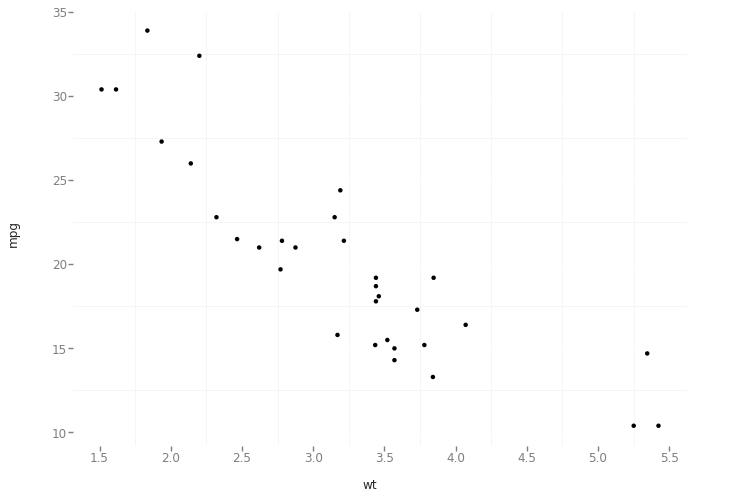

<ggplot: (8787870004393)>

In [31]:
ggplot(mtcars, aes('wt', 'mpg')) + \
    geom_point() + \
    theme_bw()

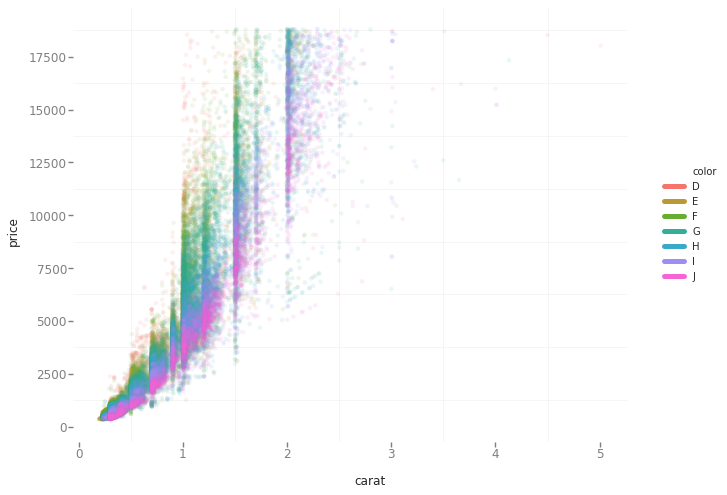

<ggplot: (8787869928049)>

In [32]:
ggplot(diamonds, aes(x='carat', y='price', color='color')) +\
    geom_point(alpha=0.1) + theme_bw()

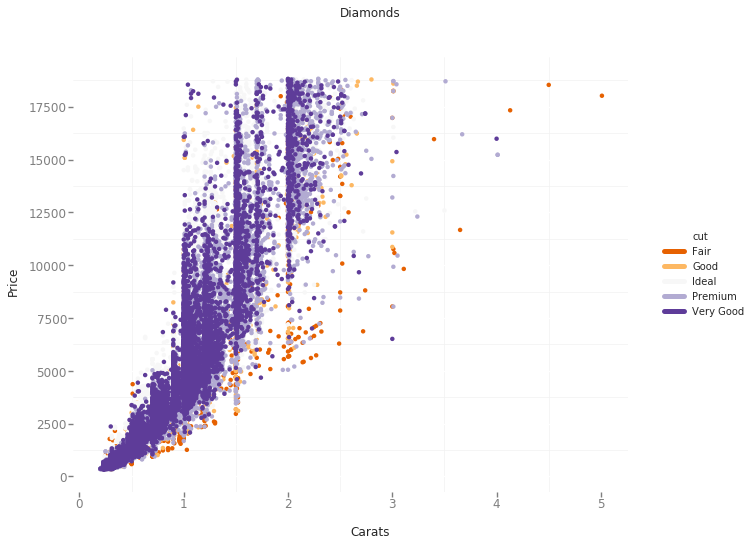

<ggplot: (-9223363248986587760)>

In [33]:
ggplot(diamonds, aes(x='carat', y='price', color='cut')) +\
    geom_point() +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Carats") + ylab("Price") + ggtitle("Diamonds") + \
    theme_bw()

### Using Plotly

In [8]:
trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = Data([trace0, trace1])

py.offline.iplot({"data" : data, 
                  "layout": Layout(title="My first plolty graph")
                 })

In [9]:
trace3 = go.Heatmap(z=[[1, 20, 30],
                      [20, 1, 60],
                      [30, 60, 1]])
data = Data([trace3])
py.offline.iplot(data)

In [12]:
# Create random data with numpy
import numpy as np

N = 1000
random_x = np.random.randn(N)
random_y = np.random.randn(N)

# Create a trace
trace = go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.offline.iplot(data, filename='basic-scatter')

In [13]:
# Create random data with numpy
import numpy as np

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N)+5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N)-5

# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'markers',
    name = 'markers'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'lines',
    name = 'lines'
)

data = [trace0, trace1, trace2]
py.offline.iplot(data, filename='scatter-mode')

In [28]:
import numpy as np

trace1 = go.Scatter(
    y = np.random.randn(500),
    mode='markers',
    marker=dict(
        size='16',
        color = np.random.randn(500), #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]

py.offline.iplot(data, filename='scatter-plot-with-colorscale')